<a href="https://colab.research.google.com/github/LTRibeiros/AnaliseDeDados_Python/blob/main/Prova_Laborat%C3%B3rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/heart.csv',  sep=',')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dados.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [9]:
dados.shape

(918, 12)

Exercicio 1 -

In [6]:
dados['Age'].mean()

np.float64(53.510893246187365)

In [8]:
dados['Age'].median()

54.0

In [10]:
dados['Age'].mode()

,Age
0,54


Exercicio 2 -

In [23]:
import matplotlib.pyplot as plt

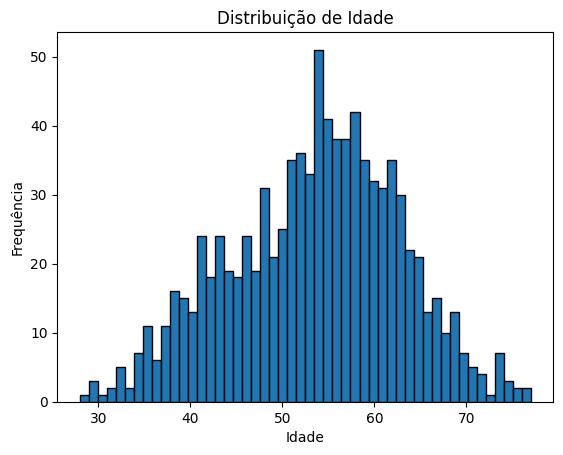

In [26]:
plt.hist(dados['Age'], bins =50, edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


3- Nesse caso, como o histograma tem uma concentração no meio, a media, moda e mediana tendem a ser próximas. Logo, nesse caso a media representa a centralidade dos dados.

Exercicio 4 -

In [27]:
sexo_F = dados[dados['Sex'] == 'F']
sexo_M = dados[dados['Sex'] == 'M']

In [33]:
porcentagem_f = len(sexo_F) / len(dados['Sex'])
porcentagem_f * 100

21.0239651416122

In [34]:
porcentagem_m = len(sexo_M) / len(dados['Sex'])
porcentagem_m * 100

78.9760348583878

In [36]:
porcentagem_total = len(sexo_F) + len(sexo_M)
porcentagem_total # verificação com o espaço amostral, se porcentagem_total == 918, ebtão os dados estão certos

918

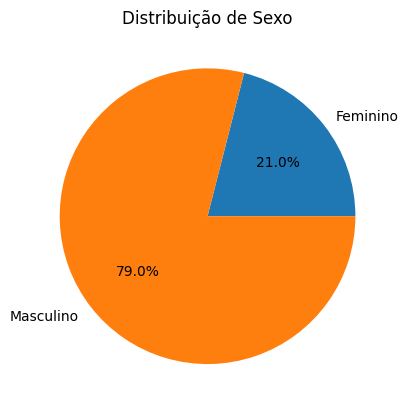

In [38]:
plt.pie([porcentagem_f, porcentagem_m], labels=['Feminino', 'Masculino'], autopct='%1.1f%%')
plt.title('Distribuição de Sexo')
plt.show()

Exercicio 5 -

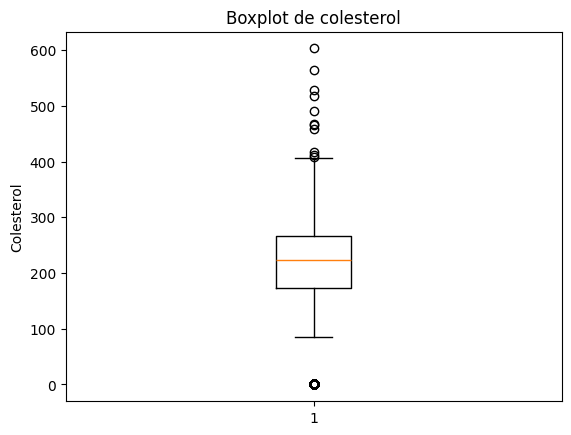

In [39]:
plt.boxplot(dados['Cholesterol'])
plt.title('Boxplot de colesterol')
plt.ylabel('Colesterol')
plt.show()


In [51]:
q1 = np.percentile(dados['Cholesterol'], 25) #q1 representa 25% da data
q2 = np.percentile(dados['Cholesterol'], 50) #q2 representa 50% da data
q3 = np.percentile(dados['Cholesterol'], 75) #q3 representa 75% da data

minimo = dados['Cholesterol'].min()
maximo = dados['Cholesterol'].max()

In [52]:
print(f"Minimo: {minimo}") # 0 colesterol??
print(f"Q1: {q1}")
print(f"(Q2): {q2}")
print(f"Q3: {q3}")
print(f"Maximo: {maximo}")

Minimo: 0
Q1: 173.25
(Q2): 223.0
Q3: 267.0
Maximo: 603


6 - sim! possui aoutliers gritantes, especificamente o 0. para a validação, podemos calcular o limite interquartil e identifica-los

In [59]:
q1 = np.percentile(dados['Cholesterol'], 25)
q3 = np.percentile(dados['Cholesterol'], 75)
iqr = q3 - q1

In [60]:
limite_maximo = q3 + 1.5 * iqr
limite_minimo = q1 - 1.5 * iqr

In [61]:
outliers = dados[(dados['Cholesterol'] < limite_minimo) | (dados['Cholesterol'] > limite_maximo)]

In [62]:
print(outliers)
print(len(outliers))

#com esses dados, podemos exclui-los do gráfico principal, acredito que essa seja a melhor maneira de lidar com esses outliers.

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
28     127              N  

In [63]:
dados_filtrados = dados[(dados['Cholesterol'] >= limite_minimo) & (dados['Cholesterol'] <= limite_maximo)]

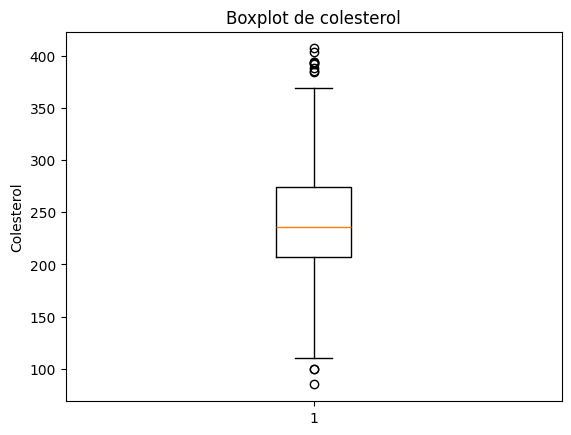

In [64]:
# e recriar o gráfico:
plt.boxplot(dados_filtrados['Cholesterol'])
plt.title('Boxplot de colesterol')
plt.ylabel('Colesterol')
plt.show()

Exercicio 7 -

In [65]:
dados['Cholesterol'].mean()

np.float64(198.7995642701525)

In [67]:
dados['Cholesterol'].median()

223.0

In [68]:
dados['Cholesterol'].mode()

,Cholesterol
0,0


In [79]:
cholesterol_counts = dados['Cholesterol'].value_counts()
print(cholesterol_counts) #a moda é realmente 0

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64


A moda de colesterol, tirando os registros '0', é 254

Exercicio 8 -

In [ ]:
idade_menor_35 = dados[dados['Age']< 35]


In [83]:
len(idade_menor_35)

21

In [91]:
p_menor35_masculino = len(idade_menor_35[idade_menor_35['Sex'] == 'M']) / len(dados)
p_menor35_masculino * 100

1.6339869281045754

Exercicio 9 -

In [92]:
p_menor35_feminino = len(idade_menor_35[idade_menor_35['Sex'] == 'F']) / len(dados)
p_menor35_feminino * 100

0.6535947712418301

In [93]:
dados.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Exercicio 10 -

In [114]:
p_NdoençaCardiaca = len(dados[dados['HeartDisease'] == False]) / len(dados)
p_NdoençaCardiaca * 100 #chance de nao ser cardiaca

44.66230936819172

In [115]:
p_SdoençaCardiaca = len(dados[dados['HeartDisease'] == True]) / len(dados)
p_SdoençaCardiaca * 100 #chance de ser cardiaca

55.33769063180828

In [117]:
from scipy.stats import binom

In [119]:
Vintesorteios = binom.cdf(8, 20, p_SdoençaCardiaca)
Vintesorteios * 100 #calculo de até 8 com 20 chances

np.float64(12.432473548273306)

Exercicio 11 -

In [124]:



# Contador dos tipos de dor
frequency_table = dados['ChestPainType'].value_counts().reset_index()
frequency_table.columns = ['ChestPainType', 'Frequencia_absoluta']

# Frequencia relativa
frequency_table['Frequencia_relativa'] = frequency_table['Frequencia_absoluta'] / len(dados)

# Frequencia cumulativa
frequency_table['Frequencia_acumulada'] = frequency_table['Frequencia_absoluta'].cumsum()


frequency_table

,ChestPainType,Frequencia_absoluta,Frequencia_relativa,Frequencia_acumulada
0,ASY,496,0.540305,496
1,NAP,203,0.221133,699
2,ATA,173,0.188453,872
3,TA,46,0.050109,918
